## Merge of the dataset of oscar and movies budet/popu/rating 

the_oscar_award.csv comes from:  https://www.kaggle.com/datasets/unanimad/the-oscar-award
movie_stat.csv comes from : https://github.com/danielgrijalva/movie-stats/blob/master/movies.csv

In [75]:
import pandas as pd

In [76]:
# oscars dataset : drop useless columns, change name to match the other datasets, keep only 4 categories of nominations
oscars = pd.read_csv('data/the_oscar_award.csv')
oscars = oscars[oscars['category'].str.contains('ACTOR|ACTOR IN A SUPPORTING ROLE|ACTRESS|ACTRESS IN A SUPPORTING ROLE|DIRECTING', regex=True)]
oscars.rename(columns={'film': 'movie_name'}, inplace=True)
oscars.rename(columns={'year_film': 'Movie release date'}, inplace=True)

oscars['movie_name'] = oscars['movie_name'].str.lower().str.replace(' ', '_')

oscars

,Movie release date,year_ceremony,ceremony,category,name,movie_name,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,the_noose,False
1,1927,1928,1,ACTOR,Emil Jannings,the_last_command,True
2,1927,1928,1,ACTRESS,Louise Dresser,a_ship_comes_in,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th_heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,sadie_thompson,False
...,...,...,...,...,...,...,...
10800,2023,2024,96,DIRECTING,Justine Triet,anatomy_of_a_fall,False
10801,2023,2024,96,DIRECTING,Martin Scorsese,killers_of_the_flower_moon,False
10802,2023,2024,96,DIRECTING,Christopher Nolan,oppenheimer,True
10803,2023,2024,96,DIRECTING,Yorgos Lanthimos,poor_things,False


In [77]:
# need to have only one row per movie: addition of a 'num_nominations' column to count the number of nominations per movie, 
# and a 'winner' column to know if the movie won the category and by who --> will be matched with the actors we are interested in

oscars_to_merge = oscars.groupby(['movie_name'], as_index=False).agg({
    'Movie release date': 'first',
    'category': lambda x: ', '.join(f"{cat}: {name}" for cat, name in zip(x, oscars.loc[x.index, 'name'])),
    'winner': lambda x: ', '.join(oscars.loc[x.index, 'name'][oscars.loc[x.index, 'winner']]),
    'category': 'count'
}).rename(columns={'category': 'num_nominations'})

oscars_to_merge['winner'].value_counts()

winner
                            933
Walter Brennan                3
Katharine Hepburn             3
Ingrid Bergman                3
Alfonso Cuarón                2
                           ... 
Joaquin Phoenix               1
Van Heflin                    1
Jane Wyman                    1
Bette Davis, Fay Bainter      1
Lila Kedrova                  1
Name: count, Length: 337, dtype: int64

In [78]:
movie_stats = pd.read_csv('data/movie_stats.csv')
movie_stats.rename(columns={'name': 'movie_name'}, inplace=True)
movie_stats.rename(columns={'year': 'Movie release date'}, inplace=True)
movie_stats['movie_name'] = movie_stats['movie_name'].str.lower().str.replace(' ', '_')

def convert_to_datetime(date):
    # Check if the date is just a year (4 digits) and convert it to 'yyyy-01-01' format
    if len(str(date)) == 4 and str(date).isdigit():  # Only year (e.g., 1988)
        return pd.to_datetime(str(date) + '-01-01')
    else:
        return pd.to_datetime(date, errors='coerce')  # Convert if it's in a full date format

movie_stats['Movie release date'] = movie_stats['Movie release date'].apply(convert_to_datetime)
movie_stats['Movie release date'] = movie_stats['Movie release date'].dt.year

movie_stats


,movie_name,rating,genre,Movie release date,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,the_shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,the_blue_lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,star_wars:_episode_v_-_the_empire_strikes_back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,more_to_life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,dream_round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,saving_mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,it's_just_us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [79]:
# CMU Movie dataset : kept all columns, change name to match the other datasets

original_data = pd.read_csv('data/movie.metadata.tsv', sep='\t', names= ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres'])
original_data.rename(columns={'Movie name': 'movie_name'}, inplace=True)

original_data['movie_name'] = original_data['movie_name'].str.lower().str.replace(' ', '_')

original_data['Movie release date'] = original_data['Movie release date'].apply(convert_to_datetime)
original_data['Movie release date'] = original_data['Movie release date'].dt.year

original_data

,Wikipedia movie ID,Freebase movie ID,movie_name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,ghosts_of_mars,2001.0,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,getting_away_with_murder:_the_jonbenét_ramsey_...,2000.0,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,brun_bitter,1988.0,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,white_of_the_eye,1987.0,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,a_woman_in_flames,1983.0,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,mermaids:_the_body_found,2011.0,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,knuckle,2011.0,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,another_nice_mess,1972.0,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,the_super_dimension_fortress_macross_ii:_lover...,1992.0,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [80]:
# merged original and movie stats 
merged = pd.merge(original_data, movie_stats, on=['movie_name', 'Movie release date'], how='left')
final_merged_data = merged.merge(oscars_to_merge, on=['movie_name', 'Movie release date'], how='left')

# drop irelevant columns
final_merged_data.drop(columns=['Wikipedia movie ID', 'Freebase movie ID', 'genre', 'released', 'country', 'runtime', 'rating', 'writer'], inplace=True)

# #rename for homogeneity
final_merged_data.rename(columns={'movie_name': 'Movie name', 'score': 'Movie score', 'votes': 'Movie votes', 'director': 'Movie director', 'star': 'Movie star', 'budget': 'Movie budget', 'gross': 'Movie gross', 'company': 'Movie company', 'num_nominations': 'Number of nomination', 'winner': 'Nomination winner'}, inplace=True)

# addition of the budget/revenues ratio 
final_merged_data['Budget/revenues ratio'] = final_merged_data['Movie box office revenue'] / final_merged_data['Movie budget']

# change of type 
final_merged_data['Movie release date'] = final_merged_data['Movie release date'].astype('Int64')

# cleaner format of the columns
def get_key_values(x):
     return ', '.join(x.values())

final_merged_data['Movie genres'] = final_merged_data['Movie genres'].apply(eval).apply(get_key_values)
#final_merged_data['Movie languages'] = final_merged_data['Movie languages'].apply(eval).apply(get_key_values) # get issue when saving to csv: 'utf-8' codec can't encode characters in position 33-44: surrogates not allowed"
final_merged_data['Movie countries'] = final_merged_data['Movie countries'].apply(eval).apply(get_key_values)

final_merged_data.to_csv('data/final_merged_data.csv', index=False)
final_merged_data


,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie score,Movie votes,Movie director,Movie star,Movie budget,Movie gross,Movie company,Number of nomination,Nomination winner,Budget/revenues ratio
0,ghosts_of_mars,2001,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",4.9,52000.0,John Carpenter,Natasha Henstridge,28000000.0,14010832.0,Screen Gems,NaN,NaN,0.500387
1,getting_away_with_murder:_the_jonbenét_ramsey_...,2000,NaN,95.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Mystery, Biographical film, Drama, Crime Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,brun_bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}",Norway,"Crime Fiction, Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,white_of_the_eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}",United Kingdom,"Thriller, Erotic thriller, Psychological thriller",6.2,2200.0,Donald Cammell,David Keith,NaN,NaN,Mrs. White's Productions,NaN,NaN,NaN
4,a_woman_in_flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}",Germany,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81736,mermaids:_the_body_found,2011,NaN,120.0,"{""/m/02h40lc"": ""English Language""}",United States of America,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81737,knuckle,2011,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","Ireland, United Kingdom","Biographical film, Drama, Documentary",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81738,another_nice_mess,1972,NaN,66.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Satire, Comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81739,the_super_dimension_fortress_macross_ii:_lover...,1992,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}",Japan,"Science Fiction, Japanese Movies, Adventure, A...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Creation of the criteria for rating **film success**



In [81]:
clean_df = final_merged_data.dropna(subset=['Movie box office revenue', 'Movie budget', 'Movie score', 'Movie votes', 'Budget/revenues ratio']).copy()
clean_df[['Movie name', 'Movie genres', 'Movie box office revenue', 'Movie budget', 'Movie score', 'Movie votes', 'Nomination winner','Budget/revenues ratio']].sort_values(by='Budget/revenues ratio', ascending = False)

,Movie name,Movie genres,Movie box office revenue,Movie budget,Movie score,Movie votes,Nomination winner,Budget/revenues ratio
33438,the_blair_witch_project,"Horror, Indie, Supernatural, Cult, Mystery, Ar...",248639099.0,60000.0,6.5,239000.0,NaN,4143.984983
67652,el_mariachi,"Thriller, Action/Adventure, Gangster Film, Ind...",2040920.0,7000.0,6.9,64000.0,NaN,291.560000
29206,napoleon_dynamite,"Indie, Absurdism, Cult, Coming of age, Comedy,...",46118099.0,400000.0,6.9,204000.0,NaN,115.295248
31667,in_the_company_of_men,"Black comedy, Drama, Indie",2856622.0,25000.0,7.2,13000.0,NaN,114.264880
24914,keeping_mum,"Black comedy, Comedy",18575768.0,169000.0,6.8,34000.0,NaN,109.915787
...,...,...,...,...,...,...,...,...
76987,the_boondock_saints,"LGBT, Thriller, Buddy film, Indie, Drama, Crim...",30471.0,6000000.0,7.8,230000.0,NaN,0.005078
58128,best_laid_plans,"Crime Fiction, Thriller, Psychological thrille...",27816.0,7000000.0,6.1,7400.0,NaN,0.003974
49848,rock_&_rule,"Musical, Science Fiction, Animation",30379.0,8000000.0,6.5,3400.0,NaN,0.003797
19093,dangerous_game,"Drama, Indie",23671.0,10000000.0,5.6,3600.0,NaN,0.002367


In [82]:
clean_df.loc[clean_df['Movie name'] == 'avatar']['Budget/revenues ratio']


23702    11.739558
Name: Budget/revenues ratio, dtype: float64

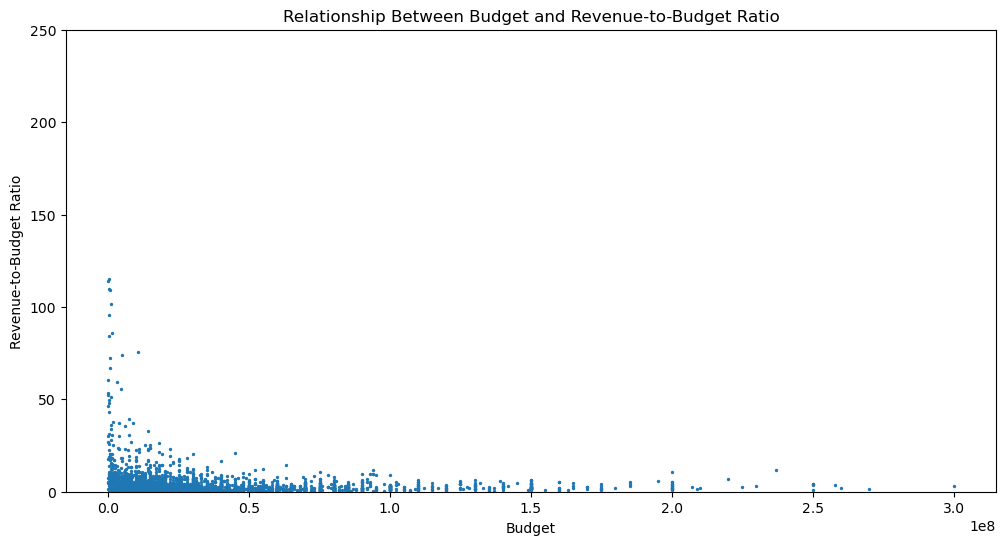

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(clean_df['Movie budget'], clean_df['Budget/revenues ratio'], s = 2)
plt.ylim((0, 250))
plt.xlabel('Budget')
plt.ylabel('Revenue-to-Budget Ratio')
plt.title('Relationship Between Budget and Revenue-to-Budget Ratio')
plt.show()

In [84]:
clean_df

,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie score,Movie votes,Movie director,Movie star,Movie budget,Movie gross,Movie company,Number of nomination,Nomination winner,Budget/revenues ratio
0,ghosts_of_mars,2001,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",4.9,52000.0,John Carpenter,Natasha Henstridge,28000000.0,14010832.0,Screen Gems,NaN,NaN,0.500387
13,henry_v,1989,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}",United Kingdom,"Costume drama, War film, Epic, Period piece, D...",7.5,29000.0,Kenneth Branagh,Kenneth Branagh,9000000.0,10161099.0,Renaissance Films,NaN,NaN,1.129011
29,baby_boy,2001,29381649.0,123.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Crime Fiction, Drama, Coming of age",6.4,14000.0,John Singleton,Alexsandra Wright,16000000.0,29381649.0,Columbia Pictures,NaN,NaN,1.836353
49,the_gods_must_be_crazy,1980,34331783.0,109.0,"{""/m/0x82"": ""Afrikaans Language"", ""/m/02h40lc""...",South Africa,"Adventure, Action/Adventure, Indie, World cine...",7.3,54000.0,Jamie Uys,N!xau,5000000.0,30031783.0,C.A.T. Films,NaN,NaN,6.866357
54,kinjite:_forbidden_subjects,1989,3416846.0,97.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Crime Fiction, Action/Adventure, Action, Thriller",5.5,2900.0,J. Lee Thompson,Charles Bronson,5000000.0,3416846.0,Golan-Globus Productions,NaN,NaN,0.683369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81659,source_code,2011,147332697.0,93.0,"{""/m/02h40lc"": ""English Language""}","France, United States of America","Thriller, Science Fiction, Action/Adventure, M...",7.5,495000.0,Duncan Jones,Jake Gyllenhaal,32000000.0,147332697.0,Summit Entertainment,NaN,NaN,4.604147
81694,wilde,1997,2158775.0,118.0,"{""/m/02h40lc"": ""English Language""}","Kingdom of Great Britain, Japan, England, Unit...","LGBT, Biography, Japanese Movies, History, Gay...",6.9,15000.0,Brian Gilbert,Stephen Fry,10000000.0,2158775.0,Samuelson Productions,NaN,NaN,0.215877
81695,coming_to_america,1988,288752301.0,117.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Romantic comedy, Comedy of manners, Drama, Com...",7.1,196000.0,John Landis,Eddie Murphy,39000000.0,288752301.0,Paramount Pictures,NaN,NaN,7.403905
81720,spaced_invaders,1990,15369573.0,100.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Alien Film, Science Fiction, Family Film, Come...",5.3,3300.0,Patrick Read Johnson,Douglas Barr,3000000.0,15369573.0,Silver Screen Partners IV,NaN,NaN,5.123191


### Elise analysis plot 



In [85]:
dataset = pd.read_csv('data/final_merged_data.csv')
original = pd.read_csv('data/movie.metadata.tsv', sep='\t', names= ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres'])
dataset.head()

,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie score,Movie votes,Movie director,Movie star,Movie budget,Movie gross,Movie company,Number of nomination,Nomination winner,Budget/revenues ratio
0,ghosts_of_mars,2001.0,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",4.9,52000.0,John Carpenter,Natasha Henstridge,28000000.0,14010832.0,Screen Gems,NaN,NaN,0.500387
1,getting_away_with_murder:_the_jonbenét_ramsey_...,2000.0,NaN,95.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Mystery, Biographical film, Drama, Crime Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,brun_bitter,1988.0,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}",Norway,"Crime Fiction, Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,white_of_the_eye,1987.0,NaN,110.0,"{""/m/02h40lc"": ""English Language""}",United Kingdom,"Thriller, Erotic thriller, Psychological thriller",6.2,2200.0,Donald Cammell,David Keith,NaN,NaN,Mrs. White's Productions,NaN,NaN,NaN
4,a_woman_in_flames,1983.0,NaN,106.0,"{""/m/04306rv"": ""German Language""}",Germany,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To establish the success of our index, we are interested in specific criteria such as budget, revenues, ratings, number of nominations, and the budget-to-revenue ratio. Our goal is to assess whether we have sufficient data and reliable information to effectively study these criteria. This will involve evaluating the completeness and accuracy of the data available for each metric, ensuring that we can draw meaningful conclusions about the factors contributing to success.